<a href="https://colab.research.google.com/github/1MedvedevV/M_AI/blob/main/DatasetEditedGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исходная таблица:
                                        Name     Mileage  Rating Review Count  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  29,636 mi.     3.9       1,800    
1          2022 Mercedes-Benz AMG SL 63 Base   5,540 mi.     4.7       1,239    
2          2022 Mercedes-Benz AMG SL 63 Base   4,890 mi.     4.7       1,239    
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  29,746 mi.     4.8         752    
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC  32,631 mi.     5.0       1,502    

      Price  
0   $30,900  
1  $139,999  
2  $132,999  
3   $58,587  
4   $95,990  

Преобразованная таблица:
   Year                                  Name  Mileage     Price  Rating  \
0  2021    Mercedes-Benz A-Class A 220 4MATIC  29636.0   30900.0     3.9   
1  2022          Mercedes-Benz AMG SL 63 Base   5540.0  139999.0     4.7   
2  2022          Mercedes-Benz AMG SL 63 Base   4890.0  132999.0     4.7   
3  2020    Mercedes-Benz AMG E 53 Base 4MATIC  29746.0   58587.0     4.8   
4  20

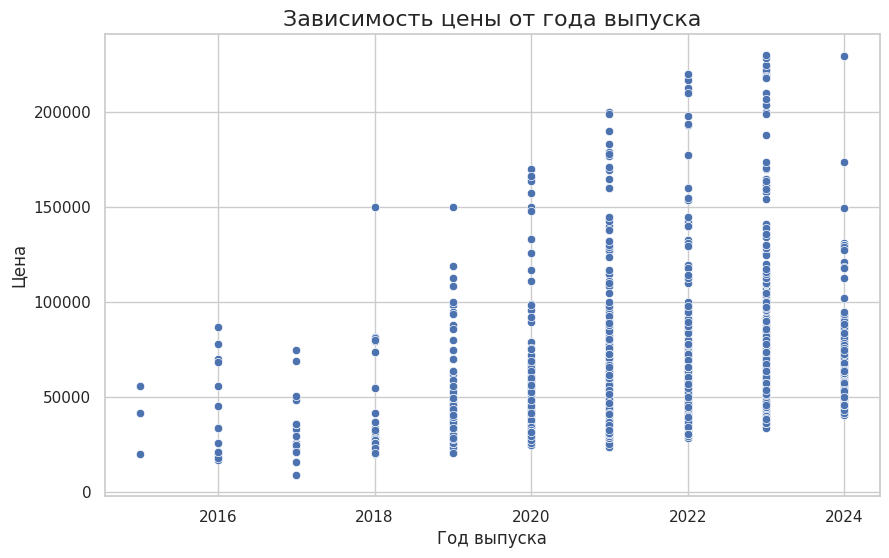

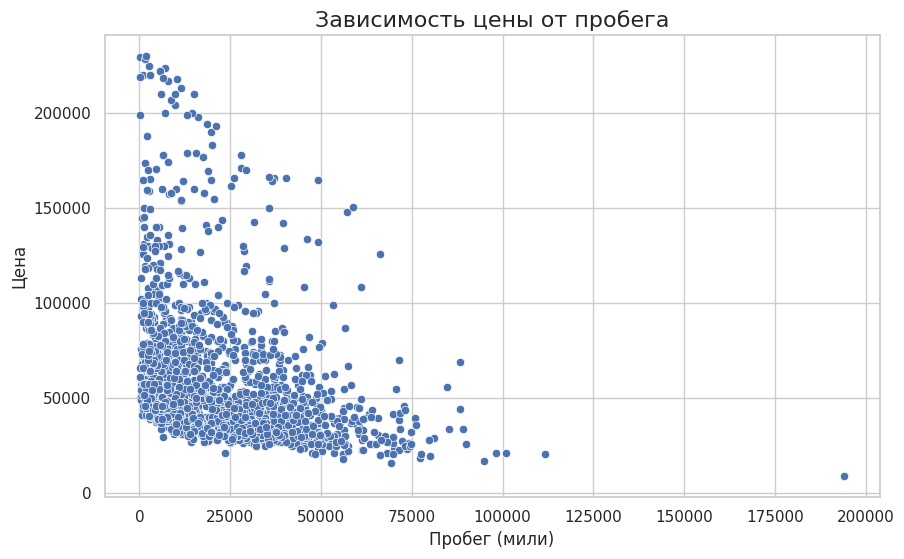

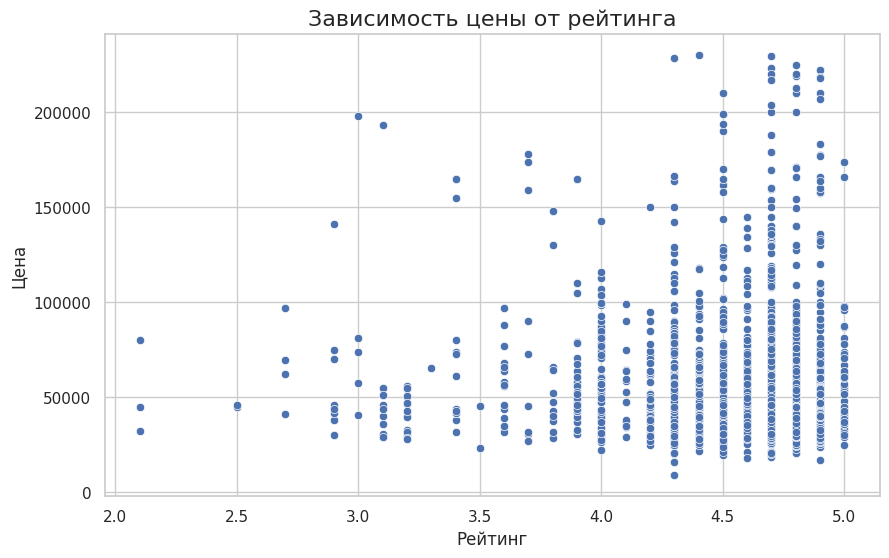

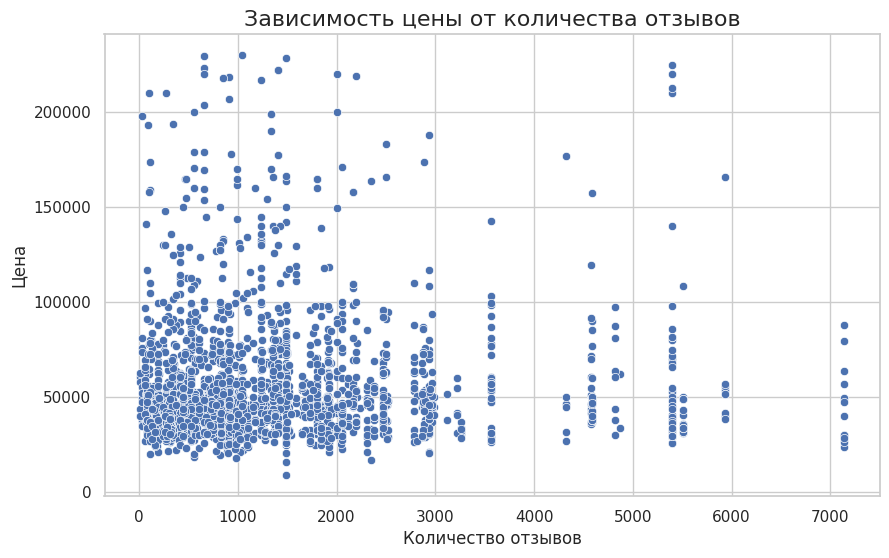

In [9]:
# Импорт библиотек
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
url = 'https://raw.githubusercontent.com/1MedvedevV/M_AI/refs/heads/main/usa_mercedes_benz_prices.csv'
df = pd.read_csv(url)

# Просмотр исходных данных
print("Исходная таблица:")
print(df.head())  # Выводим оригинальные данные

# Преобразование столбца 'Price' в числовой формат
df['Price'] = df['Price'].replace('Not Priced', np.nan)  # Заменяем 'Not Priced' на NaN
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Преобразование столбца 'Mileage' в числовой формат
df['Mileage'] = df['Mileage'].replace({' mi.': '', ',': ''}, regex=True).astype(float)

# Преобразование столбца 'Rating' в числовой формат
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Преобразование столбца 'Review Count' в числовой формат
df['Review Count'] = df['Review Count'].replace({',': '', ' ': ''}, regex=True).astype(float)

# Удаление строк с отсутствующими значениями
df = df.dropna()

# Функция для извлечения года из строки
def extract_year(name):
    # Ищем 4-значное число в начале строки (предполагаем, что это год)
    match = re.match(r'(\d{4})', name)
    if match:
        return int(match.group(0))  # Возвращаем числовое значение года
    return np.nan  # Если год не найден, возвращаем NaN

# Создаём новый столбец 'Year', извлекая год из столбца 'Name'
df['Year'] = df['Name'].apply(extract_year)

# Удаляем год из столбца 'Name' и оставляем только название модели
df['Name'] = df['Name'].str.replace(r'^\d{4} ', '', regex=True)

# Просмотр очищенных данных
print("\nПреобразованная таблица:")
print(df[['Year', 'Name', 'Mileage', 'Price', 'Rating', 'Review Count']].head())


# Настройка стиля графиков
sns.set(style="whitegrid")

# График зависимости цены от года выпуска
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Зависимость цены от года выпуска', fontsize=16)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

# График зависимости цены от пробега
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Зависимость цены от пробега', fontsize=16)
plt.xlabel('Пробег (мили)', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

# График зависимости цены от рейтинга
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', data=df)
plt.title('Зависимость цены от рейтинга', fontsize=16)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

# График зависимости цены от количества отзывов
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review Count', y='Price', data=df)
plt.title('Зависимость цены от количества отзывов', fontsize=16)
plt.xlabel('Количество отзывов', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()